# Causes of Error
Now that we have covered some basic metrics for measuring model performance, let us turn our attention to reasons <span style="color:red">why models exhibit errors in the first place.</span>

In model prediction there are two main sources of errors that a model can suffer from.
* **Bias** due to a model being unable to represent the complexity of the underlying data.
* **Variance** due to a model being overly sensitive to the limited data it has been trained on.

We will go over both in a bit more detail.

# Error due to Bias - Accuracy and Underfitting
Bias occurs when a model has enough data but is not complex enough to capture the underlying relationships. As a result, the model consistently and systematically misrepresents the data, leading to low accuracy in prediction. **This is known as underfitting.**

Simply put, bias occurs when we have an inadequate model. An example might be when we have objects that are classified by color and shape, for example easter eggs, but our model can only partition and classify objects by color. It would therefore consistently mislabel future objects--for example labeling rainbows as easter eggs because they are colorful.

Another example would be continuous data that is polynomial in nature, with a model that can only represent linear relationships. In this case it does not matter how much data we feed the model because it cannot represent the underlying relationship. <span style="color:red">To overcome error from bias, we need a more complex model.</span>

# Error due to Variance - Precision and Overfitting
When training a model, we typically use a limited number of samples from a larger population. If we repeatedly train a model with randomly selected subsets of data, we would expect its predictons to be different based on the specific examples given to it. Here variance is a measure of how much the predictions vary for any given test sample.

Some variance is normal, but too much variance indicates that the model is unable to generalize its predictions to the larger population. High sensitivity to the training set is also known as overfitting, and **generally occurs when either the model is too complex or when we do not have enough data to support it.**

We can typically <span style="color:blue">reduce the variability of a model's predictions and increase precision by training on more data</span>. <span style="color:lime">If more data is unavailable, we can also control variance by limiting our model's complexity</span>.

# Quiz: Noisy Data, Complex Model

In [3]:
%matplotlib inline

In [2]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

In [4]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

In [5]:
# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

Regressor score: 1.0000


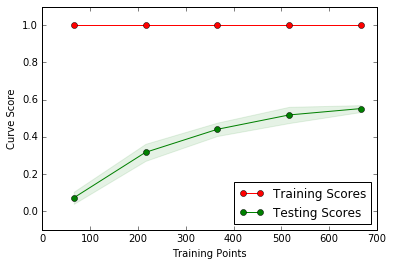

In [11]:
def plot_curve():
    reg = DecisionTreeRegressor()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need 'size', 'cv' and 'score' from above.
    
    training_sizes, training_scores, testing_scores = learning_curve(DecisionTreeRegressor(), X, y, cv=cv, scoring=score)

    # TODO: Plot the training curves and the testing curves
    #       Use plt.plot twice -- one for each score. Be sure to give them labels!
    
    training_scores_mean = np.mean(training_scores, axis=1)
    training_scores_std = np.std(training_scores, axis=1)
    
    testing_scores_mean = np.mean(testing_scores, axis=1)
    testing_scores_std = np.std(testing_scores, axis=1)
    
    plt.fill_between(training_sizes, training_scores_mean-training_scores_std,
                     training_scores_mean+training_scores_std, color='r', alpha=.1)
    plt.fill_between(training_sizes, testing_scores_mean-testing_scores_std,
                     testing_scores_mean+testing_scores_std, color='g', alpha=.1)
    
    plt.plot(training_sizes, training_scores_mean, '-o', label='Training Scores', c='r')
    plt.plot(training_sizes, testing_scores_mean, '-o',  label='Testing Scores', c='g')
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(loc='best')
    plt.show()
plot_curve()

# Improving the Validity of a Model
There is a trade-off in the value of simplicity or complexity of a model given a fixed set of data. If it is too simple, our model cannot learn about the data and misrepresents the data. However if our model is too complex, we need more data to learn the underlying relationship. Otherwise it is very common for a model to infer relationships that might not actually exist in the data.

**The key is to find the sweet spot that minimizes bias and variance by finding the right level of model complexity.** Of course with more data any model can improve, and different models may be optimal.

To learn more about bias and variance, we recommend this essay by Scott Fortmann-Roe. <br />
http://scott.fortmann-roe.com/docs/BiasVariance.html

In addition to the subset of data chosen for training, **what features you use from a given dataset can also greatly affect the bias and variance of your model.**

# Quiz: Bias, Variance, and Number of Features

## High Bias
Pays a little attention to data oversimplified. <br />
<span style="color:red">high error on training set (low r^2, large SSE - Sum of Square Errors)</span> <br />
Few features used

## High Variance
Pays too much attention to data (does not generalize well) overfits. <br />
<span style="color:red">much higher error on test set than on training set</span> <br />
Many features, carefylly optimized performance on training data.

***
> The sweet spot would be large r^2 and low SSE